In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Linear-Regression.csv')
df.head()

,x,y
0,1.0,0.7
1,1.5,2.0
2,3.0,3.0
3,4.0,4.5
4,5.2,5.5


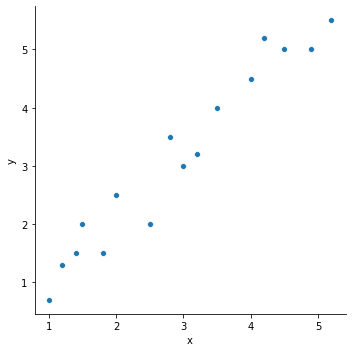

In [3]:
sns.relplot(x = 'x', y = 'y', data = df)

# GRADIENT DESCENT

In [4]:
class LinearRegression:
    def __init__(self, learning_rate = 0.001, iters = 1000):
        self.alpha = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        m = len(X)
        n = len(X[0,:])
        
        ### m = number of examples and n = number of features.
        
        self.bias = np.random.rand()
        self.weights = np.random.randn(n).reshape(n,1)
        ## J = (1/2m) * np.sum((X.W - Y)**2)
        for it in range(self.iters):
            derivative = (np.dot(X,self.weights) - y) + np.full((m,1), self.bias)
            self.weights = self.weights - (self.alpha/m)*np.dot(X.T, derivative)
            self.bias = self.bias - (self.alpha/m) * np.sum(derivative)
    def predict(self, X):
        return (np.dot(X, self.weights) + self.bias)

In [5]:
m = len(df)
X = df['x'].values.reshape(m,1)
y = df['y'].values.reshape(m,1)
clf = LinearRegression()
clf.fit(X,y)
print(clf.weights)
print(clf.bias)

[[0.83968152]]
0.8518599964781847


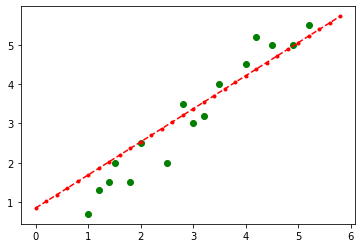

In [6]:
X_plot = np.arange(0,6, 0.2)
Y_plot = clf.weights[0] * X_plot + clf.bias
plt.scatter(X, y, c='green')
plt.plot(X_plot, Y_plot, c= "red", marker='.', linestyle='--')

# NORMAL EQUATION

In [7]:
class LinearRegression:
    def __init__(self, learning_rate = 0.001, iters = 1000):
        self.alpha = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        o = np.ones(len(X)).reshape(len(X), 1)
        X = np.concatenate((X, o), axis = 1)
        parameters = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        #print(parameters)
        self.bias = parameters[-1, 0]
        self.weights = parameters[:-1,0]
    def predict(self, X):
        return (np.dot(X, self.weights) + self.bias)

In [8]:
X = df['x'].values.reshape(m,1)
y = df['y'].values.reshape(m,1)
clf = LinearRegression()
clf.fit(X,y)
print(clf.weights)
print(clf.bias)

[1.11850913]
-0.11464852002580628


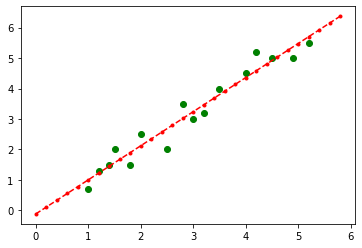

In [9]:
X_plot = np.arange(0,6, 0.2)
Y_plot = clf.weights[0] * X_plot + clf.bias
plt.scatter(X, y, c='green')
plt.plot(X_plot, Y_plot, c= "red", marker='.', linestyle='--')

# Numerical Methods for 1 feature inputs

In [10]:
class LinearRegression:
    def __init__(self, learning_rate = 0.001, iters = 1000):
        self.alpha = learning_rate
        self.iters = iters
        self.weight = None
        self.bias = None
    def fit(self, X, y):
        n = len(X)
        self.weight = ((n * np.sum(X*y))-(np.sum(X)*np.sum(y)))/((n*np.sum(X**2))-(np.sum(X)*np.sum(X)))
        self.bias = np.sum(y)/n - (self.weight * (np.sum(X)/n))
    def predict(self, X):
        return (np.dot(X, self.weight) + self.bias)

In [11]:
X = df['x'].values.reshape(m,1)
y = df['y'].values.reshape(m,1)
clf = LinearRegression()
clf.fit(X,y)
print(clf.weight)
print(clf.bias)

1.1185091289167601
-0.11464852002579384


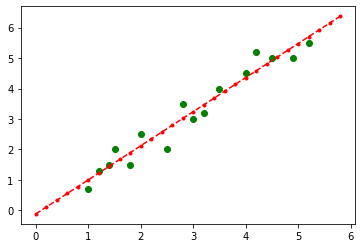

In [12]:
X_plot = np.arange(0,6, 0.2)
Y_plot = clf.weight * X_plot + clf.bias
plt.scatter(X, y, c='green')
plt.plot(X_plot, Y_plot, c= "red", marker='.', linestyle='--')

## We can see that all three types of Linear Regression algorithm are working very good. We just have to choose the most appropriate one to make the algorithm fast to learn and predict.